## Objective: predict the price of a house

### Secondary: explore characteristics of house using BI tools. 
- understanding which factors are responsible for higher property value - $650K and above.

In [39]:
import pandas as pd
import numpy as np
import matplotlib as map
from matplotlib import pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [40]:
data = pd.read_excel("data/regression_data.xls")

# EDA

In [41]:
data.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

In [43]:
data.shape

(21597, 21)

In [44]:
data.isna().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [45]:
# drop unecessary colums 
data_cleaned = data.drop(columns=["id"])

## Price

In [46]:
print("max price: $", data.price.max()) # $7.7 million

max price: $ 7700000


In [47]:
data_cleaned["price"].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

Text(0.5, 1.0, 'House Prices')

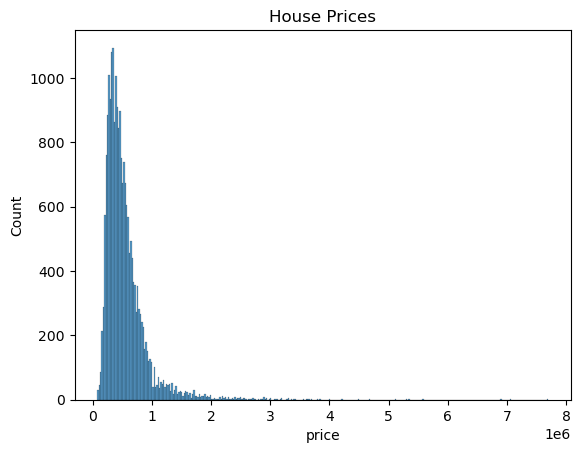

In [48]:
sns.histplot(
    x="price",
    data=data
)
plt.title("House Prices")

Text(0.5, 1.0, 'House Prices')

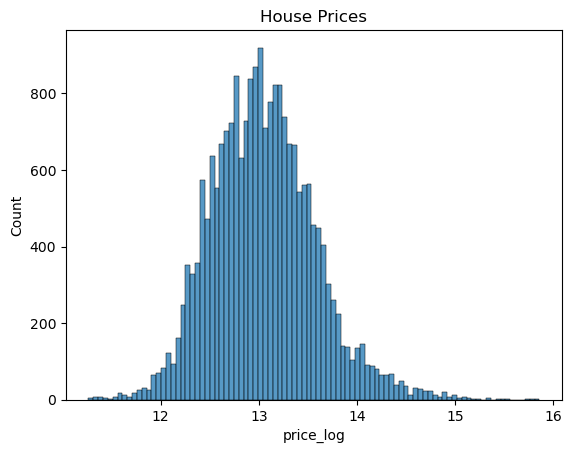

In [49]:
# use Log Transform to deal with price outliers

data_cleaned["price_log"] = np.log1p(data["price"])



# outcome: data is now normal

sns.histplot(
    x="price_log",
    data=data_cleaned
)
plt.title("House Prices")

In [50]:
data_cleaned = data_cleaned.drop(columns={"price"})

# Categorical Variables

### Zip codes

<Axes: xlabel='zipcode', ylabel='Count'>

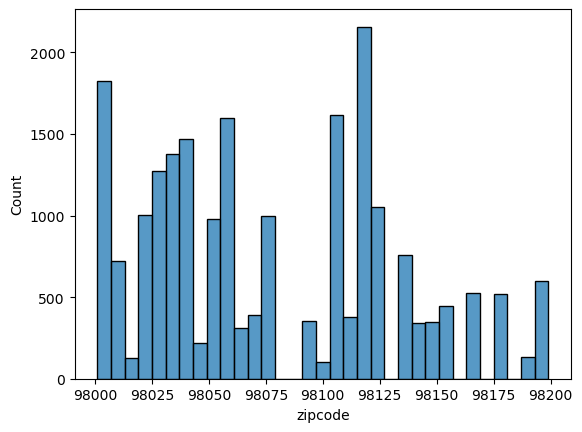

In [51]:
data_cleaned.zipcode.nunique()

sns.histplot(x="zipcode",
             data=data) 

# will drop for linear regression

## Condition

In [52]:
data_cleaned.condition.value_counts() # condition: How good the condition is (Overall). 1 indicates worn-out property and 5 excellent.

condition
3    14020
4     5677
5     1701
2      170
1       29
Name: count, dtype: int64

<Axes: xlabel='condition', ylabel='price'>

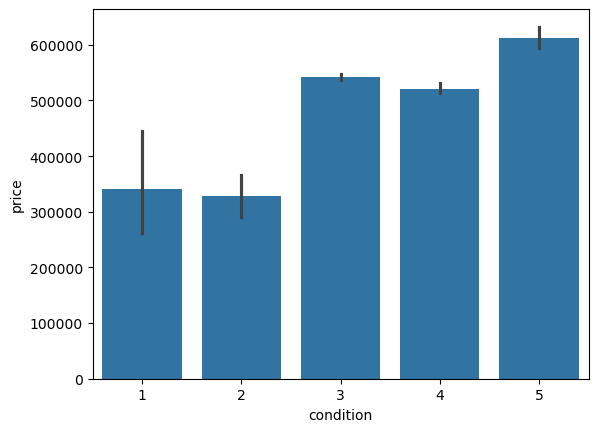

In [53]:
sns.barplot(x="condition",
            y="price",
            data=data)

## Waterfronts

In [54]:
data_cleaned.waterfront.value_counts()

waterfront
0    21434
1      163
Name: count, dtype: int64

<Axes: xlabel='waterfront', ylabel='price'>

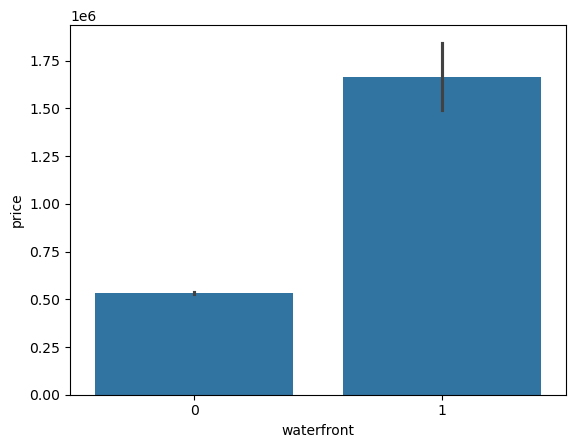

In [55]:
sns.barplot(x="waterfront",
            y="price",
            data=data)

### View

In [56]:
data_cleaned.view.value_counts()

view
0    19475
2      961
3      510
1      332
4      319
Name: count, dtype: int64

Text(0, 0.5, 'Price of house')

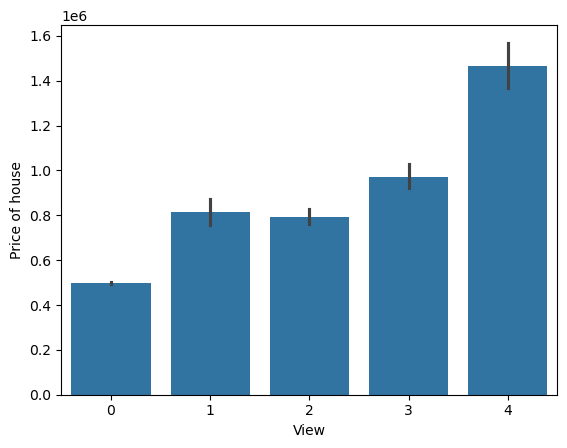

In [57]:
sns.barplot(x="view", 
            y="price",
            data=data)
plt.xlabel("View")
plt.ylabel("Price of house")

## Grade

In [58]:
data_cleaned.grade.value_counts() 
# Overall grade given to the housing unit, based on the King County grading system. 1 poor, 13 excellent.

grade
7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: count, dtype: int64

Text(0, 0.5, 'Price of house')

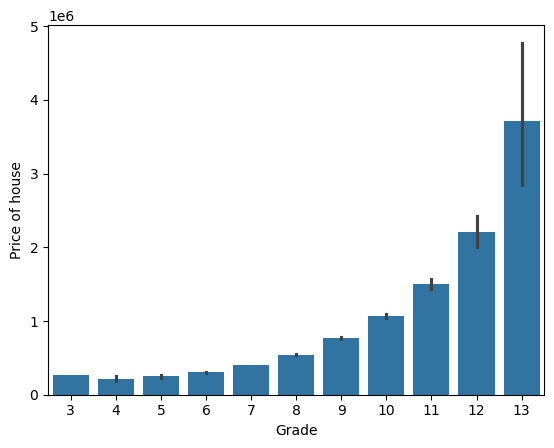

In [59]:
sns.barplot(x="grade", 
            y="price",
            data=data)
plt.xlabel("Grade")
plt.ylabel("Price of house")

## Year rennovated

In [60]:
data_cleaned.yr_renovated.value_counts()
# huge amount of 0, which in this case is likely NaN. Drop for linear regression

yr_renovated
0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: count, Length: 70, dtype: int64

In [61]:
data_cleaned.yr_built.value_counts().head(20)

yr_built
2014    559
2006    453
2005    450
2004    433
2003    420
2007    417
1977    417
1978    387
1968    381
2008    367
1967    350
1979    343
1959    334
1990    317
1962    312
1954    305
2001    305
1987    294
1989    290
1969    280
Name: count, dtype: int64

<Axes: xlabel='yr_built', ylabel='Count'>

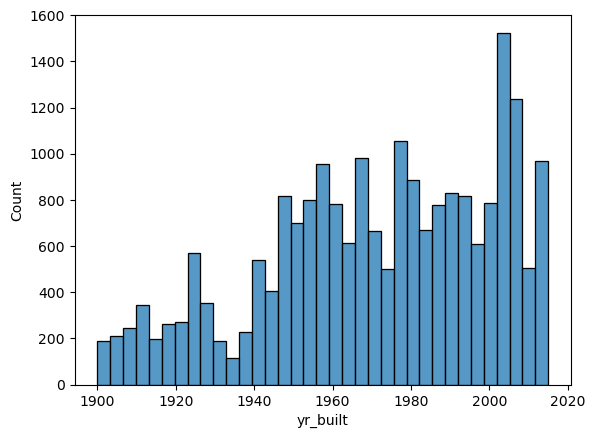

In [62]:
sns.histplot(x="yr_built",
             data=data)

<Axes: xlabel='yr_built'>

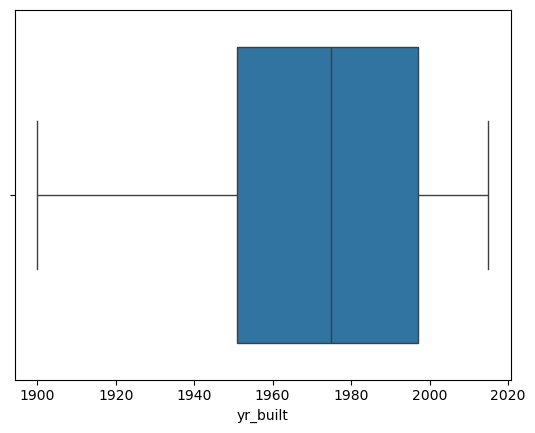

In [63]:
sns.boxplot(x="yr_built",
             data=data)

In [64]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   bedrooms       21597 non-null  int64         
 2   bathrooms      21597 non-null  float64       
 3   sqft_living    21597 non-null  int64         
 4   sqft_lot       21597 non-null  int64         
 5   floors         21597 non-null  float64       
 6   waterfront     21597 non-null  int64         
 7   view           21597 non-null  int64         
 8   condition      21597 non-null  int64         
 9   grade          21597 non-null  int64         
 10  sqft_above     21597 non-null  int64         
 11  sqft_basement  21597 non-null  int64         
 12  yr_built       21597 non-null  int64         
 13  yr_renovated   21597 non-null  int64         
 14  zipcode        21597 non-null  int64         
 15  lat            2159

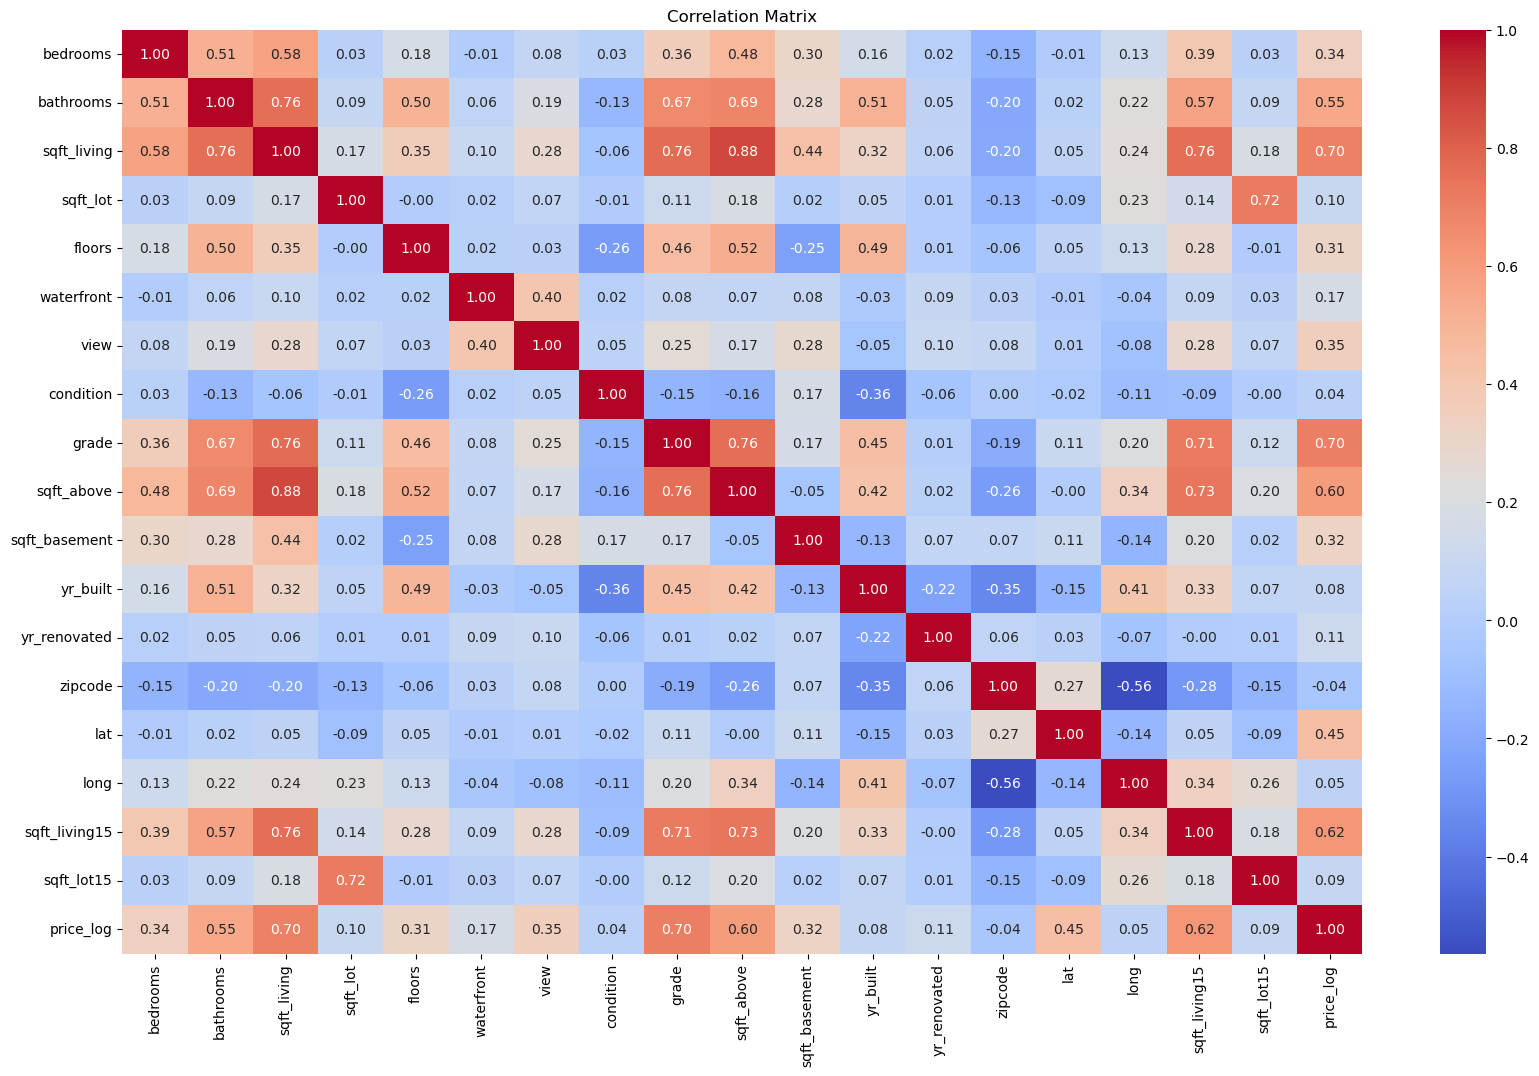

In [65]:
correlation = data_cleaned.corr(numeric_only=True)

plt.figure(figsize=(20, 12))
sns.heatmap(correlation, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### Correlates 

#### Med to high correlation with target variable: price
- sqft_living: 0.70
- grade: 0.67
- sqft_above: 0.61

#### Dropping correlates (correlate with each other)
- sqft_living & sqft_above: 0.88  (drop sqft_above)
- sqft_living & bathrroms: 0.76
- sqft_lving & grade: 0.76


#### Interactions (correlate moderately with each other and correlate strongly with the target):


In [66]:
crosstab = round((pd.crosstab(data_cleaned["waterfront"], data_cleaned["view"], normalize="index") * 100), 3)

crosstab

view,0,1,2,3,4
waterfront,,,,,
0,90.86,1.544,4.446,2.291,0.858
1,0.00,0.613,4.908,11.656,82.822


In [67]:
crosstab = pd.crosstab(data_cleaned["waterfront"], data_cleaned["view"])

crosstab

view,0,1,2,3,4
waterfront,,,,,
0,19475,331,953,491,184
1,0,1,8,19,135


In [68]:
data_cleaned["sqft_grade"] = data_cleaned["sqft_living"] * data_cleaned["grade"]

In [69]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   bedrooms       21597 non-null  int64         
 2   bathrooms      21597 non-null  float64       
 3   sqft_living    21597 non-null  int64         
 4   sqft_lot       21597 non-null  int64         
 5   floors         21597 non-null  float64       
 6   waterfront     21597 non-null  int64         
 7   view           21597 non-null  int64         
 8   condition      21597 non-null  int64         
 9   grade          21597 non-null  int64         
 10  sqft_above     21597 non-null  int64         
 11  sqft_basement  21597 non-null  int64         
 12  yr_built       21597 non-null  int64         
 13  yr_renovated   21597 non-null  int64         
 14  zipcode        21597 non-null  int64         
 15  lat            2159

In [70]:
crosstab = pd.crosstab(data_cleaned["waterfront"], data_cleaned["view"])


from scipy.stats import chi2_contingency

# Chi-square test for 'MSZoning' and 'SaleCondition'
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab)

print("Chi2-stat:", chi2_statistic) 
print("P-value:", chi2_p_value)

Chi2-stat: 7566.88988438114
P-value: 0.0


In [71]:
data.bedrooms.value_counts()

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

In [72]:
crosstab = round(pd.crosstab(data_cleaned["bedrooms"], data_cleaned["bathrooms"], normalize="index"), 2) * 100

crosstab

bathrooms,0.50,0.75,1.00,1.25,1.50,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,3.75,4.00,4.25,4.50,4.75,5.00,5.25,5.50,5.75,6.00,6.25,6.50,6.75,7.50,7.75,8.00
bedrooms,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.0,14.0,70.0,1.0,6.0,2.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,56.0,0.0,11.0,11.0,8.0,4.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,18.0,0.0,8.0,19.0,11.0,11.0,24.0,3.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,5.0,0.0,4.0,10.0,8.0,10.0,36.0,9.0,5.0,4.0,6.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,3.0,0.0,3.0,8.0,7.0,7.0,18.0,13.0,10.0,8.0,11.0,3.0,3.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,2.0,0.0,2.0,6.0,9.0,6.0,11.0,11.0,17.0,4.0,6.0,5.0,4.0,3.0,8.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,3.0,0.0,5.0,0.0,0.0,8.0,5.0,8.0,8.0,3.0,13.0,5.0,13.0,5.0,8.0,5.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,23.0,15.0,8.0,8.0,8.0,15.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,0.0,0.0,0.0,17.0,0.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0


- Bedrooms and bathrooms show a clear, structured relationship: more bedrooms generally mean more bathrooms.

- There is noise and some spread, but the pattern is consistent for normal-sized houses.
- One extreme outlier (33 bedrooms) massively distorts the regression line and should be removed or handled before modeling.

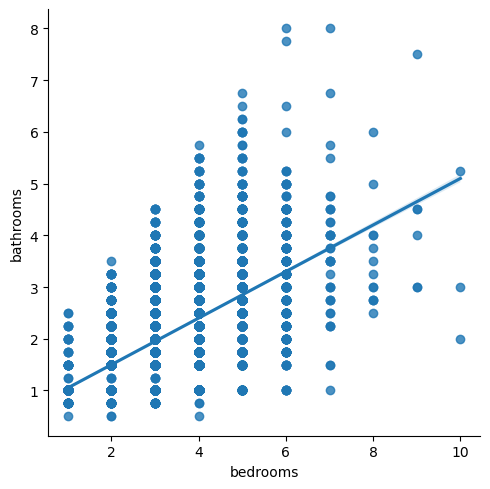

In [73]:
sns.lmplot(data=data_cleaned[data_cleaned["bedrooms"] <= 10],
           x="bedrooms", y="bathrooms")

In [74]:
# prep linear regression model 

# drop target + lat & long and redundant feature 
X = data_cleaned.drop(columns={"price_log", "lat", "long", "sqft_above", "zipcode", 'date', "yr_built", "yr_renovated", "waterfront"})
y = data_cleaned["price_log"]


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [77]:
model = LinearRegression()

# Cross-validate (default is 5-fold)
scores = cross_val_score(model, X_train_scaled, y_train, cv=5)

print("CV scores:", scores)
print("Mean CV score:", scores.mean())

model.fit(X_train_scaled, y_train)

CV scores: [0.59111114 0.60850272 0.61038909 0.6012032  0.5930955 ]
Mean CV score: 0.6008603299929154


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
from sklearn.metrics import r2_score, root_mean_squared_error, mean_squared_error

y_pred = model.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)

rmse_train = root_mean_squared_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = model.score(X_train_scaled, y_train)

rmse = root_mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) 

print("RMSE train:", rmse_train)
print("MSE train:", mse_train)
print("R2 train:", r2_train)
print("RMSE test:", rmse)
print("MSE test:", mse)
print("R2 test:", r2)

# model is underfitting

RMSE train: 0.3330571936851711
MSE train: 0.1109270942654416
R2 train: 0.6016379143486251
RMSE test: 0.3341277348492733
MSE test: 0.11164134319550628
R2 test: 0.5900827483269624


In [90]:
for feature, coef in zip(X_train.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")

bedrooms: -0.0246
bathrooms: -0.0122
sqft_living: 0.2079
sqft_lot: 0.0101
floors: 0.0405
waterfront: 0.0614
view: 0.0628
condition: 0.2311
grade: 0.0543
sqft_basement: 0.0635
sqft_living15: -0.0241
sqft_lot15: -0.0935


# KNN Regressor

In [85]:
from sklearn.neighbors import KNeighborsRegressor

X = data_cleaned.drop(columns={"price_log", "lat", "long", "sqft_above", "zipcode", 'date', "yr_built", "yr_renovated"})
y = data_cleaned["price_log"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Cross-validate (default is 5-fold)
scores = cross_val_score(model, X_train_scaled, y_train, cv=5)

print("CV scores:", scores)
print("Mean CV score:", scores.mean())


X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsRegressor(
    n_neighbors=25
)

knn.fit(X_train_scaled, y_train)

from sklearn.metrics import r2_score, root_mean_squared_error, mean_squared_error

y_pred = knn.predict(X_test_scaled)
y_train_pred = knn.predict(X_train_scaled)


rmse_train = root_mean_squared_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = knn.score(X_train_scaled, y_train)

rmse = root_mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) 

print("RMSE train:", rmse_train)
print("MSE train:", mse_train)
print("R2 train:", r2_train)
print("RMSE test:", rmse)
print("MSE test:", mse)
print("R2 test:", r2)


CV scores: [0.59480645 0.60984267 0.61004868 0.60808218 0.59584097]
Mean CV score: 0.603724189375237
RMSE train: 0.30436474985275624
MSE train: 0.09263790095293088
R2 train: 0.6663920574341764
RMSE test: 0.31785832085582927
MSE test: 0.1010339121372873
R2 test: 0.6302899279647832


# Decision Tree

In [81]:
data["price_log"] = np.log1p(data["price"])

In [96]:
from sklearn.tree import DecisionTreeRegressor

X_tree = data.drop(columns={"date", "price", "price_log"})
y_tree = data["price_log"]

X_train, X_test, y_train, y_test = train_test_split(X_tree, y_tree, random_state=42, test_size=0.2)

dt_model = DecisionTreeRegressor(max_depth=5)
dt_model.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [83]:
y_pred = dt_model.predict(X_test)

y_train_pred = dt_model.predict(X_train)


rmse_train = root_mean_squared_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = dt_model.score(X_train, y_train)

rmse = root_mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) 

print("RMSE train:", rmse_train)
print("MSE train:", mse_train)
print("R2 train:", r2_train)
print("RMSE test:", rmse)
print("MSE test:", mse)
print("R2 test:", r2)


RMSE train: 0.2538894123472562
MSE train: 0.0644598337020351
R2 train: 0.7685114356927372
RMSE test: 0.25521134340199153
MSE test: 0.06513282980104926
R2 test: 0.7608496116086813


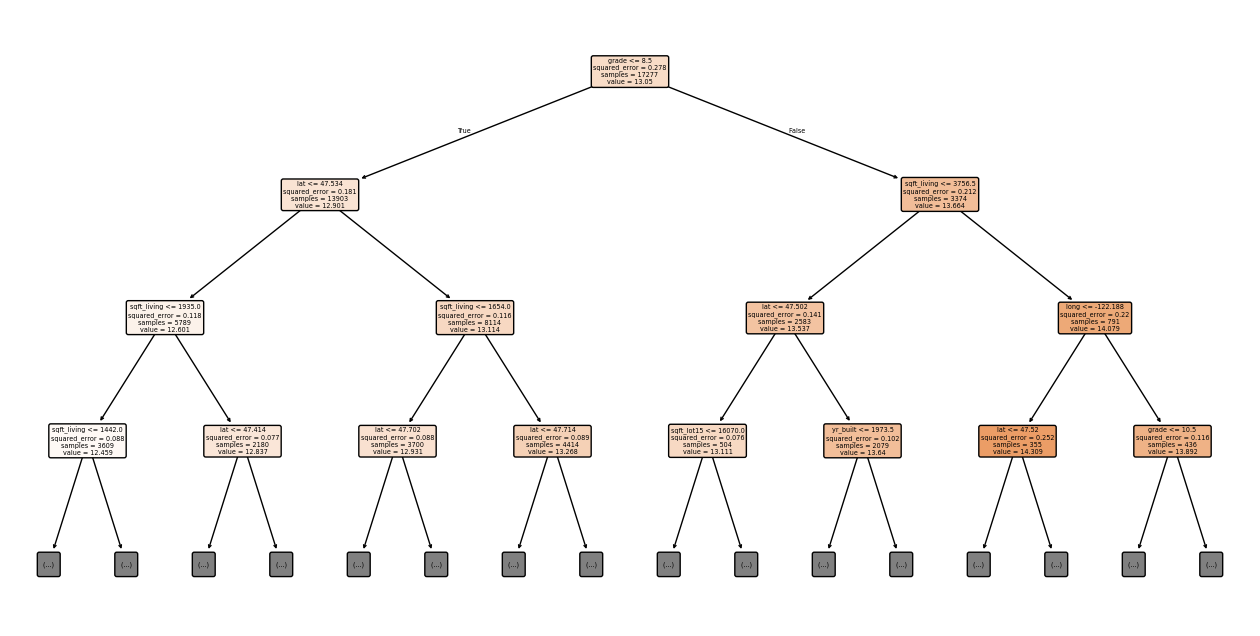

In [94]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
tree.plot_tree(dt_model, filled=True,
    feature_names=getattr(dt_model, "feature_names_in_", None),  # or X.columns
    rounded=True, max_depth=3
)
plt.show()


# Decison Tree with GridSearchCV

In [104]:
from sklearn.model_selection import GridSearchCV

X = data.drop(columns={"date", "price", "price_log"})
y = data["price_log"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # or 'r2', 'neg_root_mean_squared_error'
    n_jobs=-1  # use all CPU cores
)

# Fit it
grid_search.fit(X_train, y_train)

# Get best parameters and model
print("Best params:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

best_model = grid_search.best_estimator_

y_pred = dt_model.predict(X_test)

y_train_pred = dt_model.predict(X_train)


rmse_train = root_mean_squared_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = dt_model.score(X_train, y_train)

rmse = root_mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) 

print("RMSE train:", rmse_train)
print("MSE train:", mse_train)
print("R2 train:", r2_train)
print("RMSE test:", rmse)
print("MSE test:", mse)
print("R2 test:", r2)

Best params: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best score: -0.04903888129880235
RMSE train: 0.25565107917395374
MSE train: 0.06535747428280718
R2 train: 0.7631879468828855
RMSE test: 0.2480783965593848
MSE test: 0.06154289083947538
R2 test: 0.7818441633274267


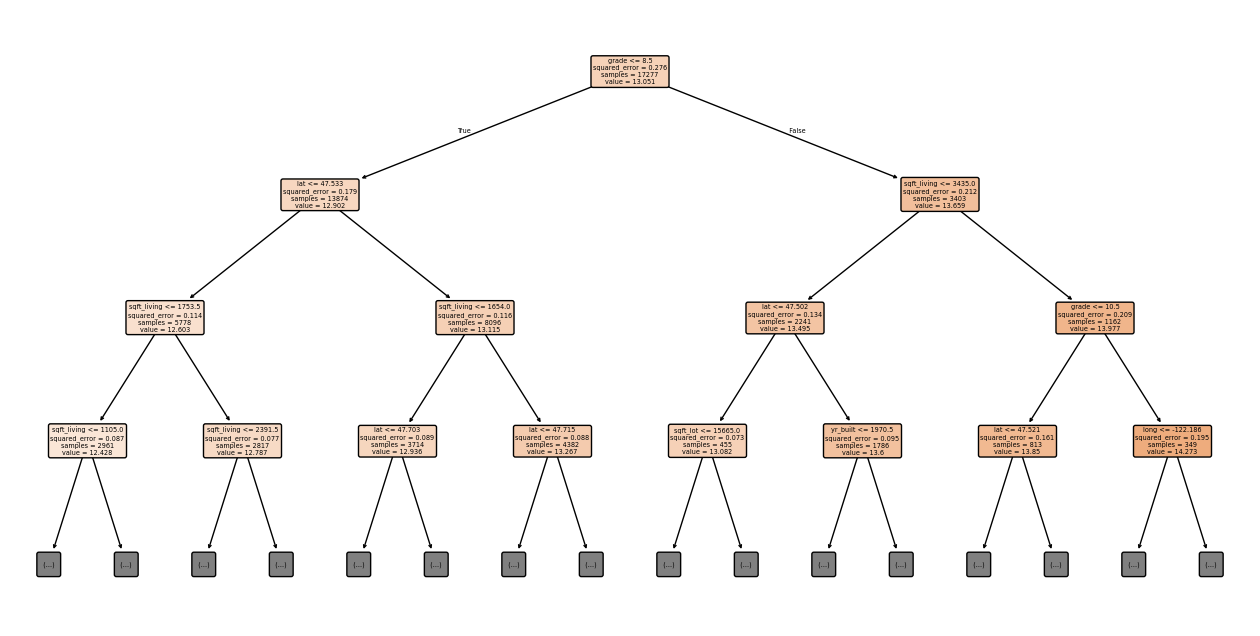

In [107]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
tree.plot_tree(best_model, filled=True,
    feature_names=getattr(best_model, "feature_names_in_", None),  # or X.columns
    rounded=True, max_depth=3
)
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor

X_tree = data.drop(columns={"date", "price", "price_log"})
y_tree = data["price_log"]


